In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("Reliance Daily Dataset.xlsx")

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988892,1367720.0,181432,9740,-0.0036
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835,19270,-0.0026
2,2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788,39864,-0.0110
3,2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603546,8596809.0,975422,26226,-0.0454
4,2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171295,9562421.0,660342,24450,0.0218
...,...,...,...,...,...,...,...,...,...,...
1989,2023-01-24,2440.000000,2443.649902,2387.350098,2415.949951,2415.949951,7609558.0,349349,15122,-0.0059
1990,2023-01-25,2412.449951,2414.699951,2380.000000,2382.550049,2382.550049,5715684.0,103914,14987,-0.0138
1991,2023-01-27,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991.0,452582,59632,-0.0190
1992,2023-01-30,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822.0,1392194,29192,0.0096


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
X=df.iloc[:,1 :].values
y=df.iloc[:,0].values
df.head

<bound method NDFrame.head of            Date         Open         High          Low        Close  \
0    2015-01-01   438.988831   441.812073   437.676270   439.781311   
1    2015-01-02   439.880371   443.818054   437.998199   438.617340   
2    2015-01-05   438.344940   441.267212   432.946106   433.812897   
3    2015-01-06   430.915344   432.401276   412.093750   414.124512   
4    2015-01-07   414.619812   425.367950   414.570282   423.139069   
...         ...          ...          ...          ...          ...   
1989 2023-01-24  2440.000000  2443.649902  2387.350098  2415.949951   
1990 2023-01-25  2412.449951  2414.699951  2380.000000  2382.550049   
1991 2023-01-27  2384.399902  2387.350098  2311.649902  2337.350098   
1992 2023-01-30  2331.699951  2371.899902  2301.000000  2359.750000   
1993 2023-01-31  2382.000000  2387.650000  2341.000000  2353.850000   

        Adj Close      Volume  No. of Shares  No. of Trades Change(%)  
0      417.988892   1367720.0         181432 

In [17]:
df.dtypes

Date             datetime64[ns]
Open                   category
High                   category
Low                    category
Close                  category
Adj Close              category
Volume                 category
No. of Shares             int64
No. of Trades             int64
Change(%)              category
dtype: object

In [18]:
df['Open']=df['Open'].astype('category')
df['Low']=df['Low'].astype('category')
df['High']=df['High'].astype('category')
df['Close']=df['Close'].astype('category')
df['Adj Close']=df['Adj Close'].astype('category')
df['Volume']=df['Volume'].astype('category')
df['Change(%)']=df['Change(%)'].astype('category')
print(df.dtypes)

Date             datetime64[ns]
Open                   category
High                   category
Low                    category
Close                  category
Adj Close              category
Volume                 category
No. of Shares             int64
No. of Trades             int64
Change(%)              category
dtype: object


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LogisticRegression().fit(X_train,y_train)
model.score(X_test,y_test)

0.935

In [26]:
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier(strategy='most_frequent',random_state=42)
dummy.fit(X_train,y_train)
dummy.score(X_test,y_test)

0.945

In [27]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_classes=2,weights=[0.95,0.05],random_state=42)

In [28]:
print(X,y)

[[-0.6693561  -0.19806908 -0.87076638 ... -1.26733697  0.26173564
   1.01664321]
 [ 0.09337237  0.78584826  0.10575379 ... -0.12270893  0.6934308
   0.91136272]
 [-0.90579721  1.03575674  0.29514098 ...  0.83049813  0.95404926
  -0.5782121 ]
 ...
 [-0.20013455 -1.46108168  1.79701652 ... -1.50280171 -1.27473745
   1.60111869]
 [ 0.03935575  0.24868361 -0.47532342 ...  0.09912579  0.54269228
   1.20827474]
 [ 0.76921528  0.47076539  0.16994471 ...  0.6561162   0.64333186
  -2.02100232]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42).fit(X_train,y_train)
rf.score(X_test,y_test)

0.955

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf.predict(X_test))

array([[189,   0],
       [  9,   2]], dtype=int64)

In [31]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision:',precision_score(y_test,model.predict(X_test)))
print('Recall:',recall_score(y_test,model.predict(X_test)))
print('F1:',f1_score(y_test,model.predict(X_test)))

Precision: 0.25
Recall: 0.09090909090909091
F1: 0.13333333333333333


In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,auc
%matplotlib inline
%config InlineBackend.figure_format='svg'

X,y=make_classification(n_samples=1000,n_classes=2,weights=[0.95,0.05],random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
model=LogisticRegression().fit(X_train,y_train)

In [33]:
probs=model.predict_proba(X_test)
probs=probs[:,1]

In [34]:
print(probs)

[1.66517889e-02 1.07786134e-02 4.82538029e-02 2.06002887e-03
 1.53826857e-02 6.20944652e-06 1.13270618e-02 2.49151920e-02
 1.65662302e-02 1.02224456e-02 1.13122757e-02 1.02225267e-01
 7.41979558e-02 2.40160740e-03 9.24861422e-03 4.60289227e-01
 2.92605456e-02 5.91921227e-02 3.06550291e-03 2.62978369e-03
 3.67051112e-02 2.06629568e-02 2.13531126e-02 7.24781966e-03
 1.32572460e-02 1.00764015e-02 3.68106984e-03 1.93108869e-02
 2.79231962e-02 6.02751078e-02 1.42605741e-03 1.28555318e-02
 2.10379214e-04 9.55231772e-03 6.00190542e-01 1.26618014e-02
 3.29045424e-01 3.97236414e-03 8.18813556e-01 8.91542760e-05
 6.28499780e-03 8.70088846e-03 7.33925508e-03 3.76465409e-03
 3.52041269e-03 3.69748750e-04 2.03791363e-03 7.20827907e-02
 5.39114483e-03 1.37359212e-02 3.85601884e-03 5.34610470e-02
 9.86587604e-03 7.49671160e-03 3.56709170e-02 1.15216106e-02
 1.97050842e-02 2.72022627e-03 2.74407933e-03 7.96410989e-04
 1.33238172e-02 1.40527749e-03 2.45588514e-02 3.38313069e-01
 2.52271786e-02 1.115775

AUC: 0.768


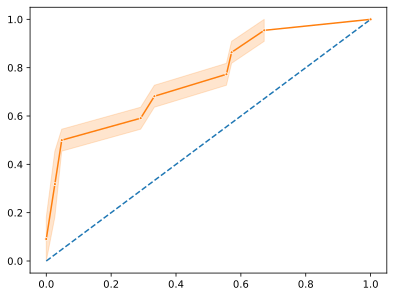

In [35]:
fpr,tpr,thresholds=roc_curve(y_test,probs)
sns.lineplot([0,1],[0,1],linestyle='--')
plt=sns.lineplot(fpr,tpr,marker='.')
auc_score=roc_auc_score(y_test,probs)
print('AUC: %.3f' %auc_score)

AUC: 0.367


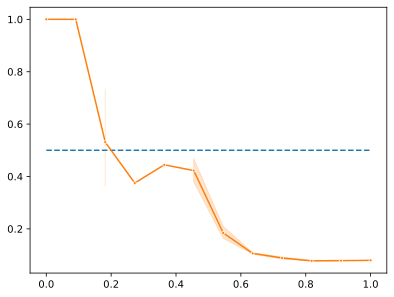

In [36]:
precision,recall,thresholds=precision_recall_curve(y_test,probs)
pr_auc_score=auc(recall,precision)
sns.lineplot([0,1],[0.5,0.5],linestyle='--')
plt=sns.lineplot(recall,precision,marker='.')
print('AUC: %.3f' %pr_auc_score)